In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/Advertising.csv')
df.head()

# Change the name of the first column to Id
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

# Check the missing values in the entire dataset
print(df.isna().sum())

# Check for duplicates
print(df.duplicated().sum())

# Check the number of rows and columns in the dataset
print("The number of rows is: ", df.shape[0])
print("The number of columns is: ", df.shape[1])

# Check statistical summary about the dataset
df.describe()

Id           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
0
The number of rows is:  200
The number of columns is:  5


,Id,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


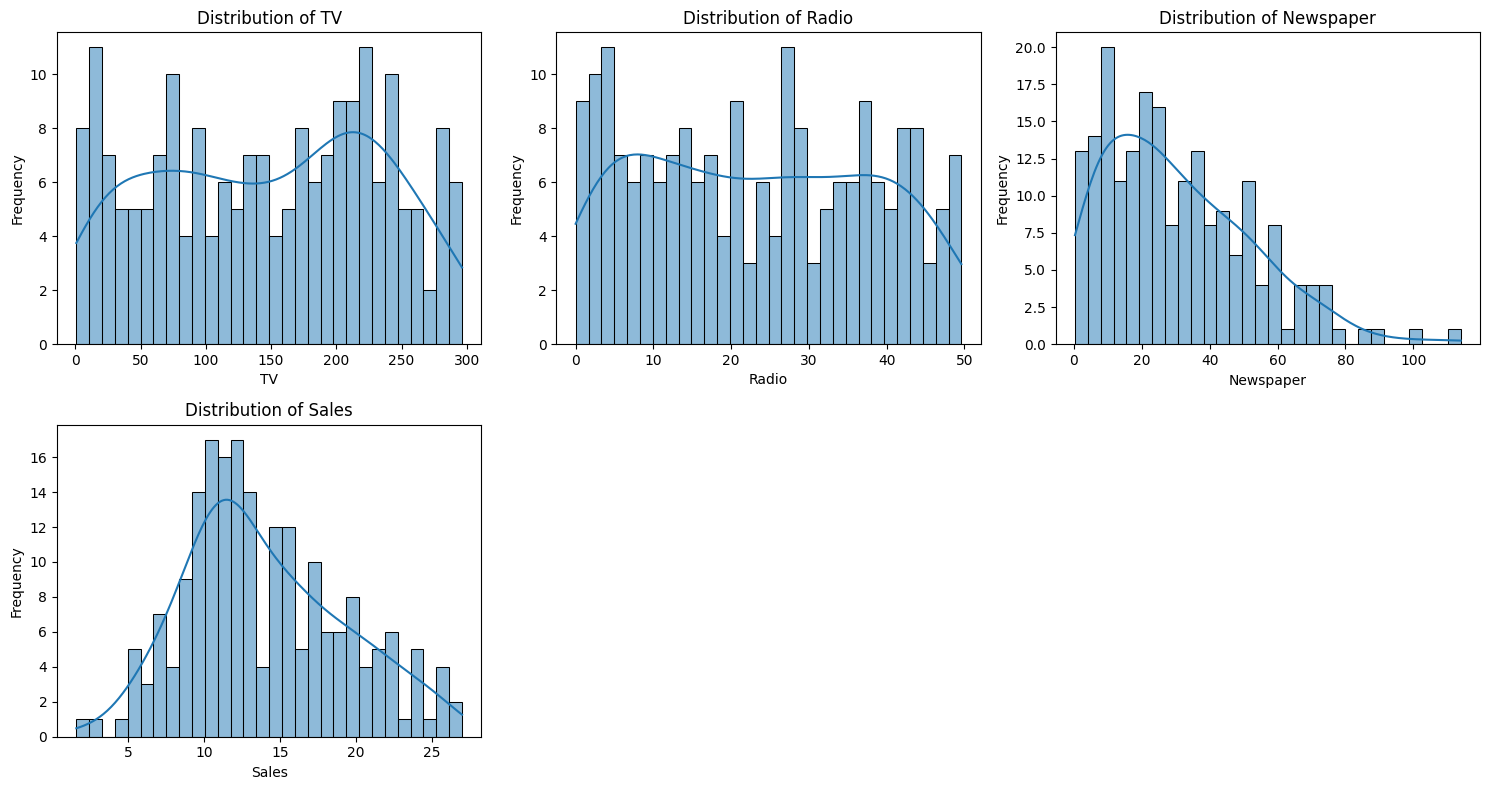

In [3]:
# Check the distribution type for each variable
# TV & Radio are uniformly distributed
# Newspaper is right skewed
# Sales is normally distributed

numerical_columns = ['TV','Radio','Newspaper','Sales']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array to simplify indexing

for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Turn off unused subplots if any
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

The below scatter plots shows the relation between each advertising type budget in K$ and the impact on unit sales in thousands.
We can notice that there is strong linear relationship between TV Advertising and Sales, and same for Radio Advertising but with lower measure.
As for newspaper thesre is weak or no clear pattern — often has low correlation with sales.

This is logic and reflect realistic situation, as nowadays newspapers has no huge audience or buyers which automatically will has low impact on sales. For this purpose, business owners should focus on TV & Radio Advertising for selling their products.

We can notice also from the below scatter plot. However, Radio Advertising cost is lower than TV cost and both are at some points reaching or leading to high unit sales, but a high Radio Advertising budget don't guarantee leading for high sales. This can be observed from some points with 40 --> 50 K$ leading to Sales below 7,000 unit sold.

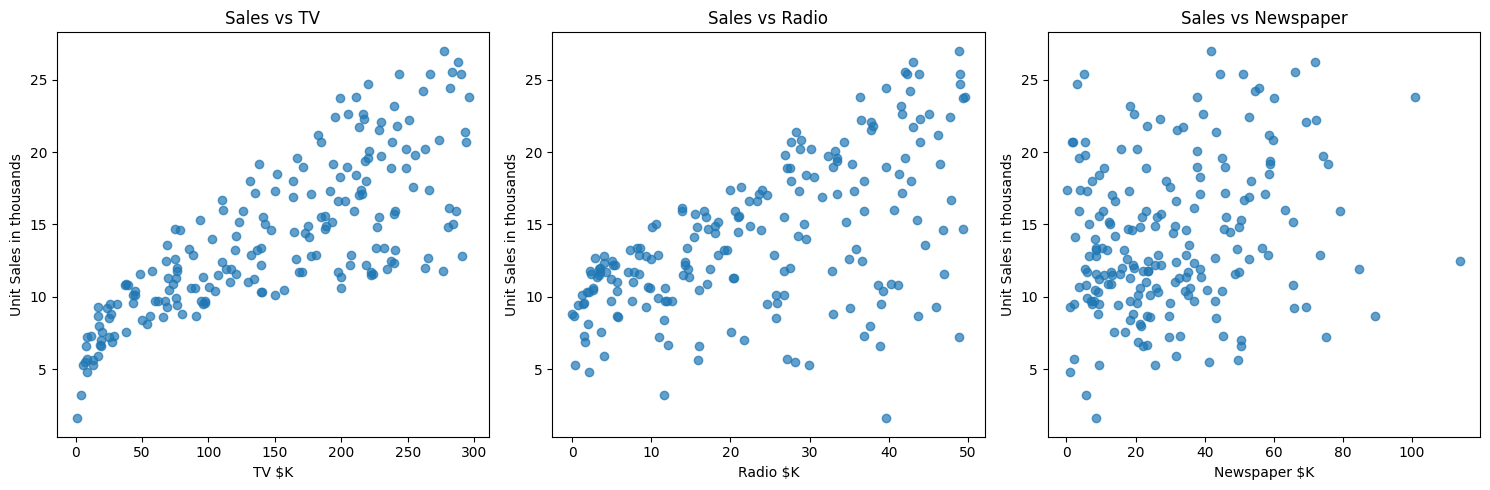

In [4]:
numerical_columns = ['TV', 'Radio', 'Newspaper']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    axes[i].scatter(df[column], df['Sales'], alpha=0.7)
    axes[i].set_title(f'Sales vs {column}')
    axes[i].set_xlabel(f'{column} $K')
    axes[i].set_ylabel('Unit Sales in thousands')

plt.tight_layout()
plt.show()

The below heatmap shows the coefficient correlation of each independent and depdenent variable. The below chart ensures what we stated in the scatter plot. In descending order, the TV advertising budget is the most advertising budget type affecting the sales with 0.78 > 0.58 (Radio) > 0.23 (Newspaper).

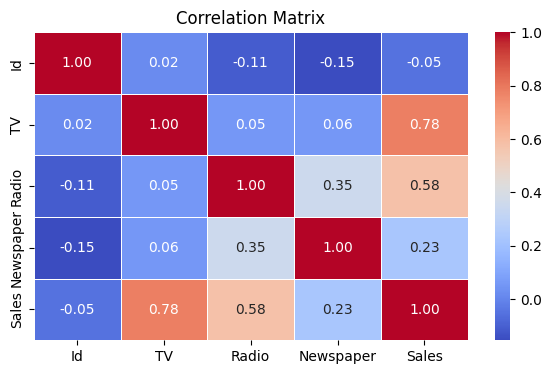

In [5]:
# Visualize the correlation matrix for numerical and ordinal columns with each one and with target variable

plt.figure(figsize=(7, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.7)
plt.title('Correlation Matrix')
plt.show()

The below scatter plot shows the three type of advertising with respect to sales on the same chart

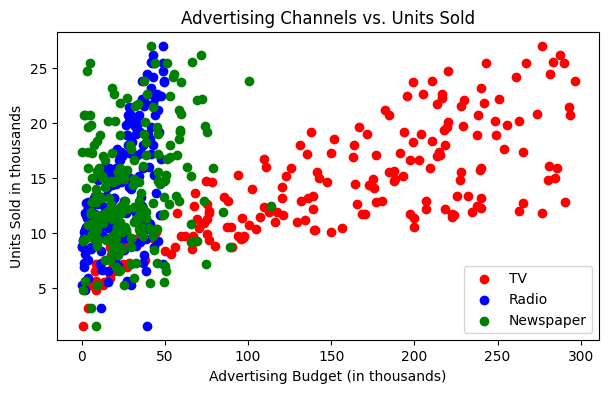

In [6]:
# Create a scatter plot for each feature vs. Sales
plt.figure(figsize=(7, 4))

plt.scatter(df['TV'], df['Sales'], color='red', label='TV')
plt.scatter(df['Radio'], df['Sales'], color='blue', label='Radio')
plt.scatter(df['Newspaper'], df['Sales'], color='green', label='Newspaper')

plt.xlabel('Advertising Budget (in thousands)')
plt.ylabel('Units Sold in thousands')
plt.title('Advertising Channels vs. Units Sold')
plt.legend()
plt.show()

As the independent variables are mostly linearly correlated with the dependent variable and for such simple and small dataset, we will be fitting and training a Linear Rgeression model on this dataset.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

X = df.drop(columns=['Sales','Id'])
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


print(f"[RESULT] MSE: {mse:.4f}")
print(f"[RESULT]  MAPE: {mape:.4f}")

[RESULT] MSE: 2.8541
[RESULT]  MAPE: 0.1486


Viewing the importance of each independent variable and its impact on the dependent variable 'Sales' in the Linear Regression model.

In [8]:
# Get coefficients
coefficients = model.coef_
feature_names = X.columns

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': abs(coefficients)  # absolute value for importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

     Feature  Coefficient  Importance
0         TV     3.809869    3.809869
1      Radio     2.808498    2.808498
2  Newspaper     0.015611    0.015611


For better illustration, we are viewing these coeffiecents in a bar graph. Again TV Advertising is the most important feature that has effect on the sales. Also, Radio has a powerful impact but still less than TV (3.8) > 2.8.

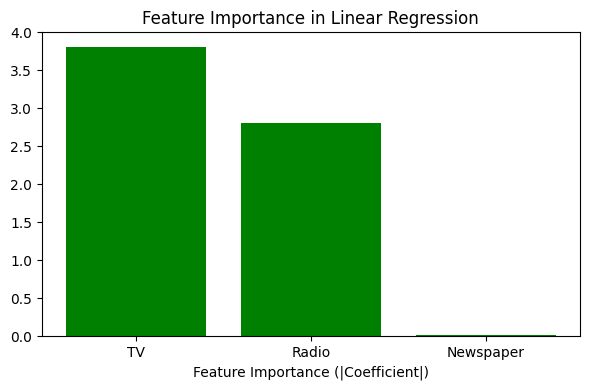

In [9]:
# Plot
plt.figure(figsize=(6, 4))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='green')
plt.xlabel('Feature Importance (|Coefficient|)')
plt.title('Feature Importance in Linear Regression')
plt.tight_layout()
plt.show()